# Data Science e Machine Learning na Prática - Introdução e Aplicações na Indústria de Processos

### Notebook 5 - Análise em Componentes Principais

por [Afrânio](http://afrjr.weebly.com) - [afraeq@gmail.com](mailto:afrjr3@gmail.com)

[Escola Piloto Prof. Giulio Massarani](http://www.escolapiloto.peq.coppe.ufrj.br/) - [Programa de Engenharia Química, COPPE, UFRJ](http://portal.peq.coppe.ufrj.br/) - 2019

Neste [notebook](http://jupyter.org/) é estudada a técnica de modelagem em variáveis latentes e redução de dimensionalidade chamada de [Análise em Componentes Principais](https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais) (ou Principal Component Analysis, PCA). 

Conceitos importantes a aprender:

* análise em componentes principais;
* modelagem em variáveis latentes;
* variância explicada;
* redução de dimensionalidade.

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Descrição da técnica

* Basicamente, o PCA realiza uma transformação de coordenadas em um conjunto de dados de modo que as novas variáveis resultantes sejam ortogonais e sejam ordenadas em ordem crescente de variância.

* As novas variáveis ortogonais criadas são chamadas de *componentes principais*.

* Os primeiros componentes principais são os mais importantes e carregam a maior parte da informação relevante de um conjunto de dados (maior variância explicada). Os últimos componentes em geral possuem informação de ruído e podem ser descartados em uma análise.

* A imagem a seguir, retirada do livro de [Gerón](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291/ref=sr_1_1?ie=UTF8&qid=1524694308&sr=8-1&keywords=hands-on+machine+learning), ilustra bem a ideia. O componente principal estaria projetado na linha cheia, já que os dados nessa projeção preservam a maior parte da variância do conjunto.

<img src="https://image.ibb.co/cfH8OK/pca.png" width="800" height="800" />

* Técnicas que criam variáveis novas a partir das variáveis originais são conhecidas como *técnicas de modelagem em variáveis latentes*.

* O PCA é uma técnica não-supervisionada.

### Aplicação no conjunto de dados Iris

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

iris_df = pd.DataFrame(X,columns=iris.feature_names)
iris_df['Classificação'] = y
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Classificação
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


Nosso objetivo é reduzir a dimensionalidade do conjunto acima para 2, mas preservando o máximo de informação (variabilidade dos dados) possível.

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA(n_components=2)

PC = pca.fit_transform(scale(X))

In [4]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [5]:
PC_df = pd.DataFrame(PC,columns = ['PC1', 'PC2'])
PC_df['Classificação'] = y
PC_df

,PC1,PC2,Classificação
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0
5,-2.070537,1.518549,0
6,-2.445711,0.074563,0
7,-2.233842,0.247614,0
8,-2.341958,-1.095146,0
9,-2.188676,-0.448629,0


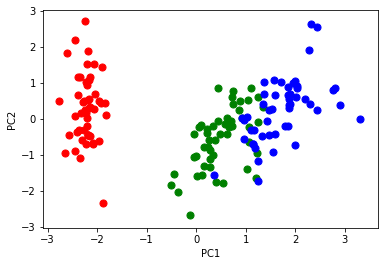

In [6]:
targets = [0,1,2]
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    i = PC_df['Classificação'] == target
    plt.scatter(PC_df.loc[i, 'PC1'], PC_df.loc[i, 'PC2'], c = color, s = 50)
    plt.xlabel('PC1')
    plt.ylabel('PC2')

As duas variáveis PC1 e PC2 acima acumulam 95% da variabilidade dos dados presente no conjunto original, de quatro variáveis.

### Aplicação no conjunto de dados MNIST

In [7]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist.data.shape

(70000, 784)

Inicializando o objeto PCA:

In [8]:
pca = PCA(0.9)

Aplicando o PCA:

In [9]:
%%time
mnist_reduzido = pca.fit_transform(mnist.data)

CPU times: user 22.6 s, sys: 1.27 s, total: 23.8 s
Wall time: 13.3 s


Verificando a nova dimensão:

In [10]:
mnist_reduzido.shape

(70000, 87)

Percebemos que, com apenas com 87 variáveis, consegue-se preservar 90% da variância!

Reconstruindo o conjunto para o tamanho original:

In [11]:
mnist_reconstruido = pca.inverse_transform(mnist_reduzido)
mnist_reconstruido.shape

(70000, 784)

Visualizando as variáveis originais e as reconstruídas:

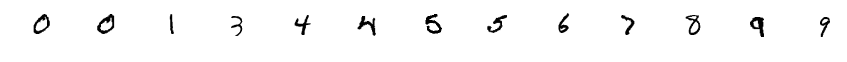

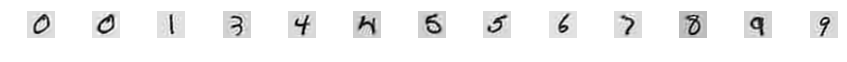

In [12]:
# localização dos exemplos na matriz de dados 
loc = [0,1,11200,23000,29000,30000,32000,36000,39000,42000,50300,55000,55010]

# selecionando os dígitos, já no formato de matriz
digitos = [mnist.data[i].reshape(28,28) for i in loc]
digitos_reconst = [mnist_reconstruido[i].reshape(28,28) for i in loc]

# plotando para o conjunto completo
fig, ax = plt.subplots(1,len(loc),figsize=(15,0.5))
[ax[i].imshow(digitos[i], cmap = matplotlib.cm.binary, interpolation="nearest") for i in range(len(loc))]
[ax[i].axis('off') for i in range(len(loc))]

fig2, ax2 = plt.subplots(1,len(loc),figsize=(15,0.5))
[ax2[i].imshow(digitos_reconst[i], cmap = matplotlib.cm.binary, interpolation="nearest") for i in range(len(loc))]
[ax2[i].axis('off') for i in range(len(loc))];

#### *Mão na massa! *

* Pesquise sobre o conjunto de dados Wine, disponível no **scikit-learn**. Descubra como importá-lo e identifique o problema de classificação a que o conjunto de dados se destina como exemplo. Aplique o PCA e selecione apenas os dois primeiros componentes principais, reduzindo a dimensionalidade do conjunto a dois. Construa um modelo classificador que tenha como conjunto de treinamento os dados de dimensão reduzida obtidos com o PCA.

### Bibliografia

* [Aurélien Géron - Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems - O'Reilly Media](https://www.amazon.com/Hands-Machine-Learning-Scikit-Learn-TensorFlow/dp/1491962291/ref=sr_1_1?ie=UTF8&qid=1524694308&sr=8-1&keywords=hands-on+machine+learning)
* https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
* https://plot.ly/ipython-notebooks/principal-component-analysis/
* https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
* https://github.com/ageron/handson-ml/blob/master/08_dimensionality_reduction.ipynb
* https://pt.wikipedia.org/wiki/An%C3%A1lise_de_componentes_principais#/media/File:GaussianScatterPCA.png
* https://github.com/mGalarnyk/Python_Tutorials/blob/master/Sklearn/PCA/PCA_Image_Reconstruction_and_such.ipynb